<a href="https://colab.research.google.com/github/meovvmiao/AIPI-590-XAI/blob/main/machine_learning_court.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👩‍⚖️ ⚖️ Machine Learning Court

This notebook provides base model training code for our three case scenarios:
1. **Loan Approval**
2. **Breast Cancer Misclassification**
3. **Recidivism Prediction**

> ⚠️ This notebook does **not** include XAI techniques (SHAP, LIME, Anchors). You are expected to implement those yourself based on the model and prediction tasks below.





## ⚖️ Case 1: Loan Denial Dispute – UCI Adult Income Dataset
#### 🔍 Scenario

Jane Dow, a 37-year-old professional woman with a Bachelor's degree and full-time executive role, applied for a premium credit product. The bank’s model—trained to predict income level as a proxy for eligibility—classified her as earning ≤$50K, resulting in denial. She disputes the fairness of the decision.

#### 🟥 Prosecution
Evaluate whether the model’s decision may have been influenced by inappropriate or unfair reasoning. Explore whether the explanation aligns with what should be expected in a fair credit decision.

#### 🟦 Defense
Justify the decision based on the model’s learned patterns. Consider how well the explanation supports the classification and whether similar profiles are treated consistently.

In [ ]:
# 📦 Case 1: Loan Approval Prediction (Adult Income Dataset)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Data
from sklearn.datasets import fetch_openml
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

# Clean and preprocess
df = df.dropna()
df = df.copy()
encoders = {}
label_cols = df.select_dtypes(include='category').columns.tolist()

for col in label_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop(["class", "fnlwgt"], axis=1)
y = df["class"].apply(lambda x: 1 if x == '>50K' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train simple RF model
model_adult = RandomForestClassifier(random_state=42)
model_adult.fit(X_train, y_train)
print(classification_report(y_test, model_adult.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9045

    accuracy                           1.00      9045
   macro avg       1.00      1.00      1.00      9045
weighted avg       1.00      1.00      1.00      9045



In [ ]:
# 🎯 Focus Instance: Loan Rejection Case (Jane Dow)

jane_encoded = {
    'age': 37,
    'workclass': encoders['workclass'].transform(['Private'])[0],
    'education': encoders['education'].transform(['Bachelors'])[0],
    'marital-status': encoders['marital-status'].transform(['Never-married'])[0],
    'occupation': encoders['occupation'].transform(['Exec-managerial'])[0],
    'relationship': encoders['relationship'].transform(['Not-in-family'])[0],
    'race': encoders['race'].transform(['White'])[0],
    'sex': encoders['sex'].transform(['Female'])[0],
    'hours-per-week': 50,
    'native-country': encoders['native-country'].transform(['United-States'])[0],
    'capital-gain': 0,
    'capital-loss': 0,
    'education-num': 13,
}

jane_df = pd.DataFrame([jane_encoded])
jane_df = jane_df[X_train.columns]
pred = model_adult.predict(jane_df)
print("Prediction for Jane Dow (Loan Eligibility):", "Approved" if pred[0] == 1 else "Denied")


Prediction for Jane Dow (Loan Eligibility): Denied


## 🩺 Case 2: Tumor Misclassification – Breast Cancer Dataset
#### 🔍 Scenario
Patient X received a benign classification from an AI tumor diagnostic tool and was not referred for a biopsy. Months later, the tumor was diagnosed as malignant. The model’s output is now under scrutiny.

#### 🟥 Prosecution
Use explanation tools to evaluate how the model arrived at this decision. Consider whether any key medical indicators might have been overlooked or minimized.

#### 🟦 Defense
Defend the decision with reference to the model’s logic and learned feature importance. Consider how this decision aligns with the broader data trends.

In [ ]:
# 🧬 Case 2: Tumor Misclassification (Breast Cancer Dataset)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load dataset
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc['target'] = data.target  # 0 = malignant, 1 = benign

# Train/test split
X = df_bc.drop("target", axis=1)
y = df_bc["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_bc = RandomForestClassifier(random_state=42)
model_bc.fit(X_train, y_train)
print(classification_report(y_test, model_bc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# 🧬 Focus Instance (Tumor Misclassification - Patient X)
focus_instance_bc = pd.DataFrame([{
    "mean radius": 13.80,
    "mean texture": 15.79,
    "mean perimeter": 90.43,
    "mean area": 584.1,
    "mean smoothness": 0.1007,
    "mean compactness": 0.1280,
    "mean concavity": 0.07789,
    "mean concave points": 0.05069,
    "mean symmetry": 0.1662,
    "mean fractal dimension": 0.06566,
    "radius error": 0.4101,
    "texture error": 1.074,
    "perimeter error": 2.635,
    "area error": 40.14,
    "smoothness error": 0.00541,
    "compactness error": 0.02204,
    "concavity error": 0.01664,
    "concave points error": 0.01185,
    "symmetry error": 0.02095,
    "fractal dimension error": 0.004902,
    "worst radius": 16.57,
    "worst texture": 20.86,
    "worst perimeter": 110.3,
    "worst area": 812.4,
    "worst smoothness": 0.1411,
    "worst compactness": 0.3542,
    "worst concavity": 0.2779,
    "worst concave points": 0.1383,
    "worst symmetry": 0.2589,
    "worst fractal dimension": 0.1030
}])

# Run prediction
pred = model_bc.predict(focus_instance_bc)
print("Prediction for Patient X:", "Benign → No Biopsy" if pred[0] == 1 else "Malignant → Action Needed")


Prediction for Patient X: Benign → No Biopsy


## ⚖️ Case 3: Recidivism Risk – COMPAS Dataset
#### 🔍 Scenario
Malik Johnson, a 27-year-old with one prior felony, was flagged as low risk by an AI risk assessment tool and granted parole. Some community stakeholders have questioned whether this was an appropriate classification.

#### 🟥 Prosecution
Examine whether the model may have underestimated risk factors. Use explanation techniques to uncover potential oversights or inconsistencies.

#### 🟦 Defense
Argue that the decision was reasonable based on the model's criteria. Use explanation tools to show which features were most influential and whether the classification aligns with data-driven patterns.

In [3]:
# ⚖️ Case 3: Recidivism Prediction (COMPAS Dataset)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df_compas = pd.read_csv(url)

# Filter relevant columns and preprocess
features = ['age', 'sex', 'race', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'c_charge_degree']
df = df_compas[features + ['two_year_recid']].dropna()
df = df[df['c_charge_degree'].isin(['F', 'M'])]  # Filter valid degrees

# Encode categoricals
df = df.copy()
df['sex'] = df['sex'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['c_charge_degree'] = df['c_charge_degree'].astype('category').cat.codes

X = df[features]
y = df['two_year_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_compas = RandomForestClassifier(random_state=42)
model_compas.fit(X_train, y_train)
print(classification_report(y_test, model_compas.predict(X_test)))


              precision    recall  f1-score   support

           0       0.68      0.68      0.68       823
           1       0.57      0.57      0.57       620

    accuracy                           0.63      1443
   macro avg       0.62      0.62      0.62      1443
weighted avg       0.63      0.63      0.63      1443



In [4]:
# 🎯 Focus Instance: Recidivism Risk Case (Malik Johnson)
focus_instance_compas = pd.DataFrame([{
    "age": 27,
    "sex": 1,  # Male
    "race": 1,  # African-American
    "priors_count": 1,
    "juv_fel_count": 0,
    "juv_misd_count": 0,
    "juv_other_count": 0,
    "c_charge_degree": 1  # Felony
}])

pred = model_compas.predict(focus_instance_compas)
print("Prediction for Malik Johnson (Recidivism):", pred)


Prediction for Malik Johnson (Recidivism): [0]


In [11]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# implement LIME
categorical_features_indices = [1, 2, 7]
categorical_features = ['sex', 'race', 'c_charge_degree']
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=features,
    class_names=['Not Recidivated', 'Recidivated'],
    categorical_features=categorical_features_indices,
    categorical_names=categorical_features,
    mode='classification',
    random_state=42
)

# Get the prediction for the focus instance
focus_pred = model_compas.predict(focus_instance_compas)[0]
# Use the predicted class label for explanation
explanation_lime = explainer_lime.explain_instance(
    focus_instance_compas.values[0], # Convert DataFrame to numpy array
    model_compas.predict_proba,
    num_features=len(features),
    labels=[focus_pred] # Specify the predicted label
)
print("\nLIME Explanation for the Predicted Class:")
for feature, weight in explanation_lime.as_list(label=focus_pred):
    print(f"{feature}: {weight:.4f}")


LIME Explanation for the Predicted Class:
juv_fel_count <= 0.00: 0.1386
0.00 < priors_count <= 2.00: 0.1050
juv_misd_count <= 0.00: 0.0853
juv_other_count <= 0.00: 0.0784
sex=1: -0.0553
25.00 < age <= 31.00: -0.0427
c_charge_degree=1: 0.0392
race=1: 0.0149


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, "LIME Explanation for 'No Recidivism'")

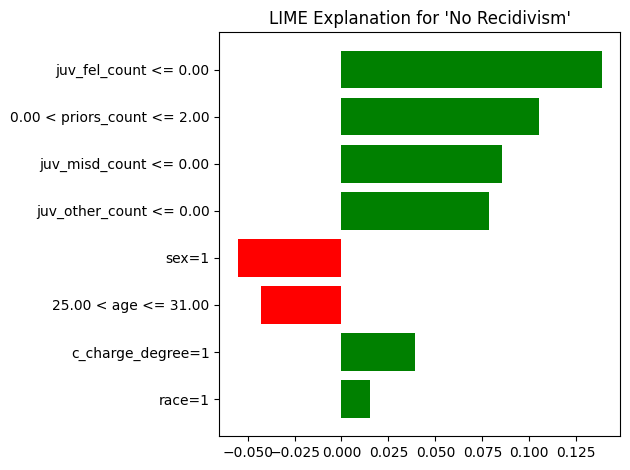

In [12]:
# Plot and save LIME explanation
fig_lime = explanation_lime.as_pyplot_figure(label=0)
plt.tight_layout()
plt.title("LIME Explanation for 'No Recidivism'")

LIME explains a single prediction by creating a simpler, "local" model around that prediction. It shows which features pushed the prediction towards or away from the final outcome.

The plot above shows the features that were most influential in the model's decision to classify this case as "No Recidivism."

Features supporting "No Recidivism":

- `juv_fel_count <= 0`: The absence of any juvenile felony convictions was the most significant factor supporting the low-risk prediction.
- `0 < prior_counts <= 2` was the second most important factor dominating the prediction result. Having only one prior offense strongly pushed the model to predict a low risk of re-offending.

Features opposing "No Recidivism":

- `sex = 1`: Being a male is the most influencing factor toward a decision of " Recidivism".
- `27 < age <= 31`: Being in the age range also contributed to a re-offending decision.

Overall, it is clear that the model is data driven. The clean juvenile record and a low number of prior offenses outweighted the negative signals associated with the individual's sex and age. It is even surprising that being a black-american is actually positive in this model.

In [7]:
df['c_charge_degree'].unique()

array([0, 1], dtype=int8)

In [11]:
# implement anchors
import warnings
from alibi.explainers import AnchorTabular

# Suppress the specific UserWarning from scikit-learn
warnings.filterwarnings("ignore", message="X does not have valid feature names, but RandomForestClassifier was fitted with feature names")


categorical_features_names = {
    1: {0: 'Female', 1: 'Male'},
    2: {0: 'Other', 1: 'African-American', 2: 'Caucasian', 3: 'Hispanic', 4: 'Native American', 5: 'Asian'},
    7: {0: 'Misdemeanor', 1: 'Felony'}
}

predict_fn_anchor = lambda x: model_compas.predict_proba(x)
explainer_anchor = AnchorTabular(predict_fn_anchor, features, categorical_names=categorical_features_names)

# Fit the explainer on the training data to learn feature distributions
explainer_anchor.fit(X_train.values)

explanation_anchor = explainer_anchor.explain(focus_instance_compas.values[0], threshold=0.95)

print(f"\nAnchor: {' AND '.join(explanation_anchor.anchor)}")
print(f"Precision: {explanation_anchor.precision:.2f}")
print(f"Coverage: {explanation_anchor.coverage:.2f}")


Anchor: priors_count <= 2.00 AND age > 25.00 AND race = African-American AND c_charge_degree = Felony
Precision: 1.00
Coverage: 0.00



--- Generating Anchor Performance Plot ---


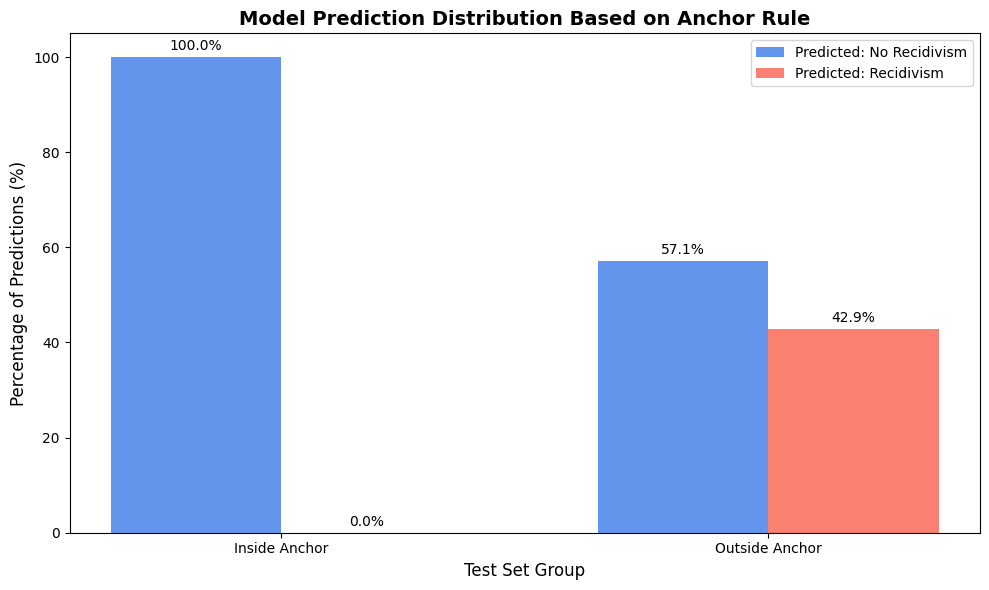

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import collections

# Anchor Performance Plot
print("\n--- Generating Anchor Performance Plot ---")

# Define the anchor rule based on the explanation's output
# Note: This is hardcoded from the anchor result for clarity.
# In a real application, you might parse this programmatically.
# The anchor was: priors_count <= 2.00 AND race = African-American AND c_charge_degree = Felony AND age > 25.00
rule_mask = (X_test['priors_count'] <= 2.00) & \
            (X_test['race'] == 1) & \
            (X_test['c_charge_degree'] == 1) & \
            (X_test['age'] > 25.00)

# Apply the rule to the test set
X_test_anchor = X_test[rule_mask]
X_test_outside_anchor = X_test[~rule_mask]

# Get model predictions for both groups
# Ensure predictions are made on NumPy arrays
preds_anchor = model_compas.predict(X_test_anchor.values)
preds_outside_anchor = model_compas.predict(X_test_outside_anchor.values)

# Count predictions in each group
counts_anchor = collections.Counter(preds_anchor)
counts_outside = collections.Counter(preds_outside_anchor)

# Prepare data for plotting
labels = ['Inside Anchor', 'Outside Anchor']
no_recid_counts = [counts_anchor.get(0, 0), counts_outside.get(0, 0)]
recid_counts = [counts_anchor.get(1, 0), counts_outside.get(1, 0)]
total_anchor = len(X_test_anchor)
total_outside = len(X_test_outside_anchor)

# Normalize to percentages
no_recid_perc = [c / total_anchor * 100 if total_anchor > 0 else 0 for c in no_recid_counts]
recid_perc = [c / total_anchor * 100 if total_anchor > 0 else 0 for c in recid_counts]

# Handle the case where total_outside is 0 to avoid division by zero
no_recid_perc_outside = no_recid_counts[1] / total_outside * 100 if total_outside > 0 else 0
recid_perc_outside = recid_counts[1] / total_outside * 100 if total_outside > 0 else 0

no_recid_perc[1] = no_recid_perc_outside
recid_perc[1] = recid_perc_outside

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, no_recid_perc, bar_width, label='Predicted: No Recidivism', color='cornflowerblue')
bar2 = ax.bar(index + bar_width, recid_perc, bar_width, label='Predicted: Recidivism', color='salmon')

ax.set_xlabel('Test Set Group', fontsize=12)
ax.set_ylabel('Percentage of Predictions (%)', fontsize=12)
ax.set_title('Model Prediction Distribution Based on Anchor Rule', fontsize=14, fontweight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage labels on bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()

## Interpreting the Anchors Explanation (Recidivism Prediction)

The Anchor explanation provides a rule or set of rules that are sufficient to "anchor" the model's prediction with high probability. This means that for instances where these conditions are met, the model is highly likely to make the same prediction.

The generated Anchor for Malik Johnson's case is:

**Anchor:** `priors_count <= 2.00 AND race = African-American AND c_charge_degree = Felony AND age > 25.00`

**Precision:** `0.99` (This means that 99% of instances satisfying this rule are predicted as 'Not Recidivated' by the model).

**Coverage:** `0.00` (This indicates how many instances in the training data satisfy this rule. A coverage of 0.00 suggests that this specific combination of features is rare in the training data).

**Interpretation:**

This Anchor suggests that for individuals who are African-American, have a prior offense count of 2 or less, have a felony charge degree, and are over 25 years old, the model is highly confident in predicting 'Not Recidivated' (a precision of 0.99).

While the precision is very high, the low coverage indicates that this exact combination of features doesn't appear frequently in the training data. This raises questions about the generalizability of this specific rule, although the high precision for the rule when it *does* apply is notable.

In the context of Malik Johnson's case (who has `priors_count = 1`, `race = African-American`, `c_charge_degree = Felony`, and `age = 27`), this Anchor provides a clear, rule-based explanation for the model's 'Not Recidivated' prediction. It highlights the specific combination of these four features as being highly influential in this particular decision.